A. Briefly explain in 1-2 sentences the concepts of Covariance and Correlation, and
describe their relationship. You may use equations for clarification.

Covariance indicates the direction of a relationship between two variables (positive if they increase together, negative if one decreases as the other increases), but its value depends on the units of the data. Correlation standardizes covariance, measuring both the strength and direction of the relationship on a scale from -1 to 1, using the formula:
  

$$
r = \frac{\text{cov}(X, Y)}{\sigma_X \sigma_Y}
$$

B. Load the Iris dataset, using any method of your choice (e.g.: pd.read_csv("iris.csv")
in Pandas).


In [5]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn

iris_df=sns.load_dataset("iris")


Use visualization to explore the relationship between the different features.

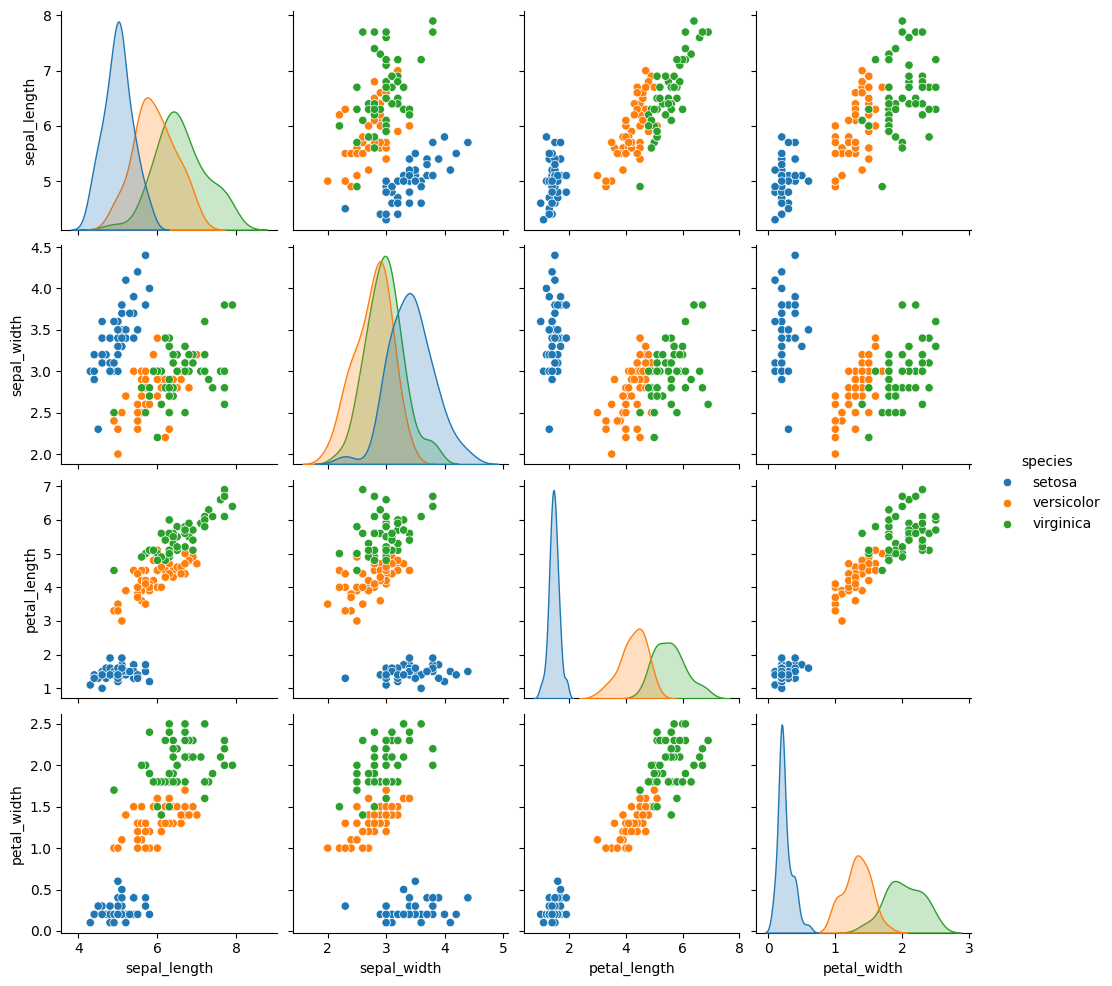

In [6]:

sns.pairplot(iris_df, hue='species')
plt.show()


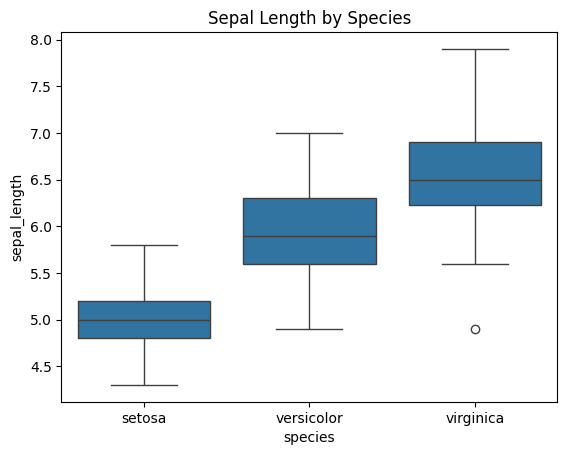

In [7]:
# Boxplot for Sepal Length by species
sns.boxplot(x='species', y='sepal_length', data=iris_df)
plt.title('Sepal Length by Species')
plt.show()



C. Implement the following functions:
a. A function to calculate the covariance between two variables:
def calcCov(x, y)


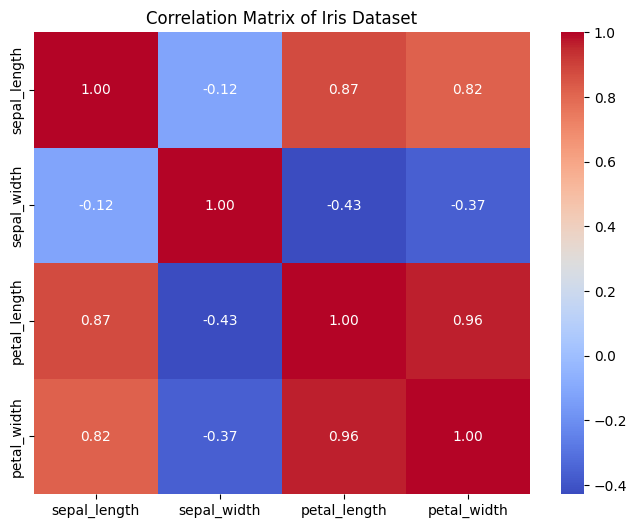

In [8]:
# Drop the 'species' column before calculating correlation
numerical_data = iris_df.drop('species', axis=1)

# Calculate the correlation matrix for numerical columns only
correlation_matrix = numerical_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Iris Dataset')
plt.show()


b. A function to compute the Covariance matrix:
def covMat(data):
covMat(data) should return an n by n covariance matrix, where n is the
number of features (in case of the iris dataset n=4)

In [9]:


def calcCov(x, y):
    """Calculates the covariance between two variables."""
    x = np.array(x)
    y = np.array(y)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    cov = np.sum((x - mean_x) * (y - mean_y)) / (len(x) - 1)
    return cov

def covMat(data):
    """Computes the covariance matrix of the dataset."""
    numerical_data = data.select_dtypes(include=[np.number])  # Select only numerical columns
    n = numerical_data.shape[1]
    cov_matrix = np.zeros((n, n))
    
    # Calculate covariance for each pair of columns
    for i in range(n):
        for j in range(n):
            cov_matrix[i, j] = calcCov(numerical_data.iloc[:, i], numerical_data.iloc[:, j])
    
    # Convert to DataFrame with labels for better readability
    cov_df = pd.DataFrame(cov_matrix, columns=numerical_data.columns, index=numerical_data.columns)
    
    return cov_df

# Test on Iris dataset
cov_matrix_df = covMat(iris_df)
print(cov_matrix_df)



              sepal_length  sepal_width  petal_length  petal_width
sepal_length      0.685694    -0.042434      1.274315     0.516271
sepal_width      -0.042434     0.189979     -0.329656    -0.121639
petal_length      1.274315    -0.329656      3.116278     1.295609
petal_width       0.516271    -0.121639      1.295609     0.581006


D. Test1: compare the results of your function with NumPy's
np.cov(data,rowvar=False) using the iris dataset.

In [10]:


def calcCov(x, y):
    """Calculates the covariance between two variables."""
    x = np.array(x)
    y = np.array(y)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    cov = np.sum((x - mean_x) * (y - mean_y)) / (len(x) - 1)
    return cov

def covMat(data):
    """Computes the covariance matrix of the dataset."""
    numerical_data = data.select_dtypes(include=[np.number])  # Select only numerical columns
    n = numerical_data.shape[1]
    cov_matrix = np.zeros((n, n))
    
    # Calculate covariance for each pair of columns
    for i in range(n):
        for j in range(n):
            cov_matrix[i, j] = calcCov(numerical_data.iloc[:, i], numerical_data.iloc[:, j])
    
    # Convert to DataFrame with labels for better readability
    cov_df = pd.DataFrame(cov_matrix, columns=numerical_data.columns, index=numerical_data.columns)
    
    return cov_df

# Using the Iris dataset
iris_df = sns.load_dataset("iris")

# Get the covariance matrix from my function
custom_cov_matrix = covMat(iris_df)

# Get the covariance matrix from NumPy
numerical_data = iris_df.select_dtypes(include=[np.number])
numpy_cov_matrix = np.cov(numerical_data, rowvar=False)

# Display both results
print("Custom Covariance Matrix:")
print(custom_cov_matrix)
print("\nNumPy Covariance Matrix:")
print(pd.DataFrame(numpy_cov_matrix, columns=numerical_data.columns, index=numerical_data.columns))


Custom Covariance Matrix:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      0.685694    -0.042434      1.274315     0.516271
sepal_width      -0.042434     0.189979     -0.329656    -0.121639
petal_length      1.274315    -0.329656      3.116278     1.295609
petal_width       0.516271    -0.121639      1.295609     0.581006

NumPy Covariance Matrix:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      0.685694    -0.042434      1.274315     0.516271
sepal_width      -0.042434     0.189979     -0.329656    -0.121639
petal_length      1.274315    -0.329656      3.116278     1.295609
petal_width       0.516271    -0.121639      1.295609     0.581006


E. Using your covariance function, implement a function to calculate the correlation
matrix:
def corrMat(data):
<should use covMat(data) and return the correlation matrix>

In [11]:

def corrMat(data):
    """Computes the correlation matrix from the dataset."""
    # Calculate the covariance matrix using your function
    cov_matrix = covMat(data)
    
    # Calculate standard deviations for each feature
    std_devs = data.select_dtypes(include=[np.number]).std()
    
    # Initialize an empty correlation matrix
    corr_matrix = cov_matrix.copy()
    
    # Calculate the correlation for each pair of features
    for i in range(len(corr_matrix)):
        for j in range(len(corr_matrix)):
            corr_matrix.iloc[i, j] = cov_matrix.iloc[i, j] / (std_devs.iloc[i] * std_devs.iloc[j])
    
    return corr_matrix

# Using the Iris dataset
iris_df = sns.load_dataset("iris")

# Calculate the correlation matrix
corr_matrix = corrMat(iris_df)

# Display the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)


Correlation Matrix:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


F. Test2: validate your correlation matrix implementation by comparing it with the
results of NumPy's np.corrcoef(data,rowvar=False), using the iris dataset.

In [12]:

# Use the Iris dataset
iris_df = sns.load_dataset("iris")

# Calculate correlation matrix using your function
custom_corr_matrix = corrMat(iris_df)

# Calculate correlation matrix using NumPy's np.corrcoef
# We exclude the 'species' column as it is non-numeric and causes issues
numeric_iris_df = iris_df.select_dtypes(include=[np.number])

numpy_corr_matrix = np.corrcoef(numeric_iris_df, rowvar=False)

# Compare the two matrices
print("My Custom Correlation Matrix:\n")
print(custom_corr_matrix)

print("\nNumPy's Correlation Matrix:\n")
print(numpy_corr_matrix)

# The difference to see how close the two matrices are
difference = np.allclose(custom_corr_matrix, numpy_corr_matrix)
print("\nAre the correlation matrices the same? ", difference)


My Custom Correlation Matrix:

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000

NumPy's Correlation Matrix:

[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]

Are the correlation matrices the same?  True


G. Use visualizations to communicate the tests results. Include appropriate titles,
axis labels, and colorbars where relevant.


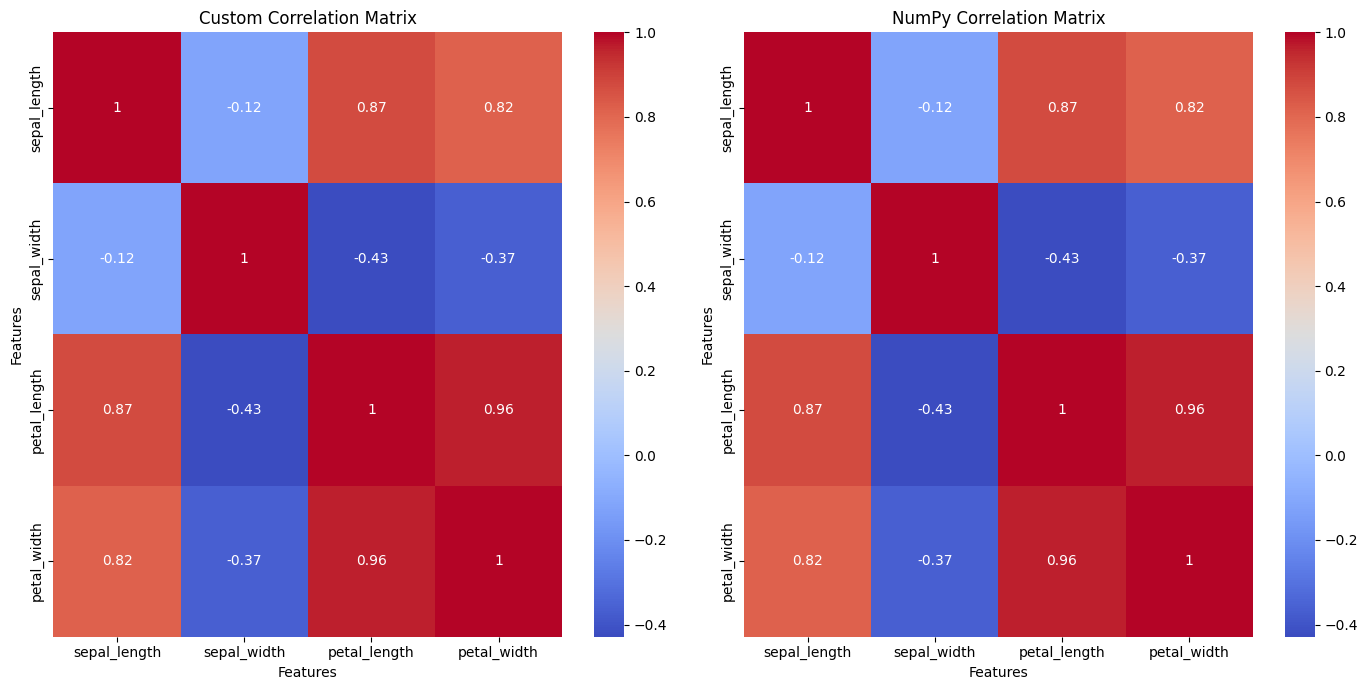

In [13]:
# Figure for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot heatmap for the custom correlation matrix
sns.heatmap(custom_corr_matrix, annot=True, cmap='coolwarm', ax=axes[0], cbar=True, 
            xticklabels=custom_corr_matrix.columns, yticklabels=custom_corr_matrix.columns)
axes[0].set_title("Custom Correlation Matrix")
axes[0].set_xlabel("Features")
axes[0].set_ylabel("Features")

# Plot heatmap for NumPy's correlation matrix
sns.heatmap(numpy_corr_matrix, annot=True, cmap='coolwarm', ax=axes[1], cbar=True, 
            xticklabels=numeric_iris_df.columns, yticklabels=numeric_iris_df.columns)
axes[1].set_title("NumPy Correlation Matrix")
axes[1].set_xlabel("Features")
axes[1].set_ylabel("Features")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


Q2: For this question you will use the dataset titled “laptop-price – dataset.csv”.

Import the libraries mentioned above and import the dataset from your filesystem into the
code.

In [17]:

import os
os.chdir('/Users/jimena/Documents/MiniProject')  # Change the working directory to where your files are
print(os.getcwd())  # Confirm it has changed to the correct path

# Step 2: Load the Dataset
laptops_df = pd.read_csv('LaptopPriceDataset.csv')

# Display the first few rows of the dataset to understand its structure
print(laptops_df.head())




/Users/jimena/Documents/MiniProject
  Company      Product   TypeName  Inches                    ScreenResolution  \
0   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Macbook Air  Ultrabook    13.3                            1440x900   
2      HP       250 G6   Notebook    15.6                   Full HD 1920x1080   
3   Apple  MacBook Pro  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

  CPU_Company       CPU_Type  CPU_Frequency (GHz)  RAM (GB)  \
0       Intel        Core i5                  2.3         8   
1       Intel        Core i5                  1.8         8   
2       Intel  Core i5 7200U                  2.5         8   
3       Intel        Core i7                  2.7        16   
4       Intel        Core i5                  3.1         8   

                Memory GPU_Company                GPU_Type  OpSys  \
0            128GB SSD       

Plot the price for all the laptops

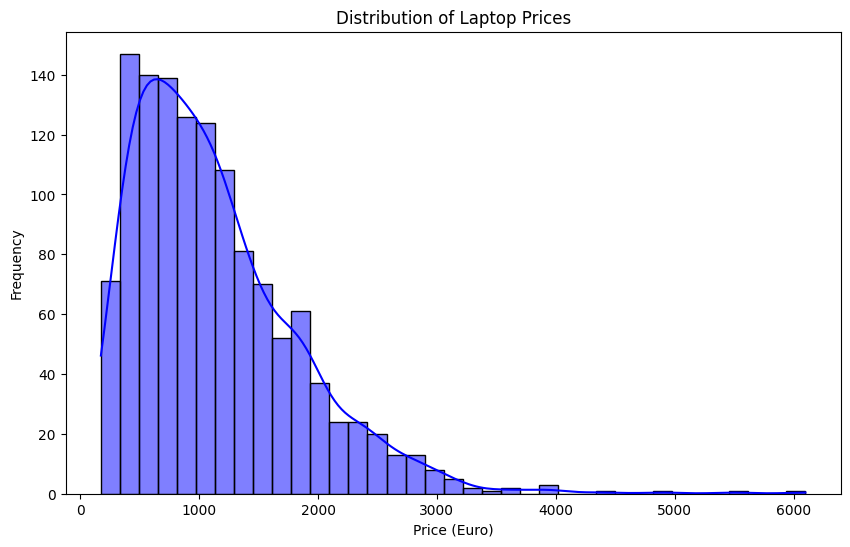

In [20]:
# Standardizing column names to prevent issues
laptops_df.columns = laptops_df.columns.str.strip().str.lower()

# Plotting the price distribution
plt.figure(figsize=(10, 6))
sns.histplot(laptops_df['price (euro)'], kde=True, color='blue')
plt.title("Distribution of Laptop Prices")
plt.xlabel("Price (Euro)")
plt.ylabel("Frequency")
plt.show()



Which company has on average the most expensive laptop? What is the average
laptop price for each company?

Average Laptop Prices by Company:
company
Acer          633.464455
Apple        1564.198571
Asus         1123.829737
Chuwi         314.296667
Dell         1199.225120
Fujitsu       729.000000
Google       1677.666667
HP           1080.314664
Huawei       1424.000000
LG           2099.000000
Lenovo       1093.862215
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500

The company with the most expensive laptops on average is: Razer
Their average laptop price is: 3346.14 Euro


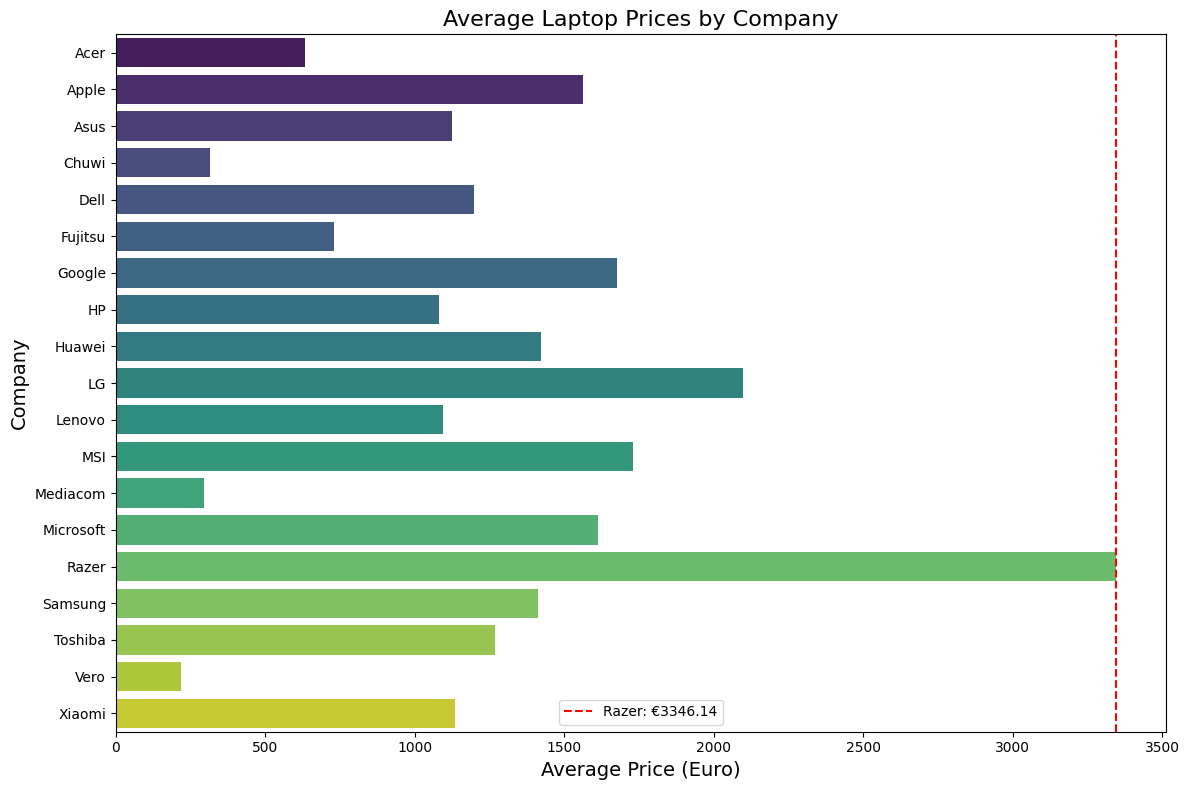

In [ ]:
import warnings

# Suppress warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Group by 'company' and calculate the mean price
average_price_per_company = laptops_df.groupby('company')['price (euro)'].mean()

# Find the company with the highest average price
most_expensive_company = average_price_per_company.idxmax()
highest_average_price = average_price_per_company.max()

# Print results without dtype info
print("Average Laptop Prices by Company:")
print(average_price_per_company.to_string())  # Converts Series to plain text

print(f"\nThe company with the most expensive laptops on average is: {most_expensive_company}")
print(f"Their average laptop price is: {highest_average_price:.2f} Euro")

# Plotting the results
plt.figure(figsize=(12, 8))
sns.barplot(
    x=average_price_per_company.values, 
    y=average_price_per_company.index, 
    palette="viridis",
    hue=None
)

# Adding titles and labels
plt.title("Average Laptop Prices by Company", fontsize=16)
plt.xlabel("Average Price (Euro)", fontsize=14)
plt.ylabel("Company", fontsize=14)

# Highlight the most expensive company
plt.axvline(x=highest_average_price, color='red', linestyle='--', label=f'{most_expensive_company}: €{highest_average_price:.2f}')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


Find the different types of Operating systems present in the data - under the column
name "OpSys".

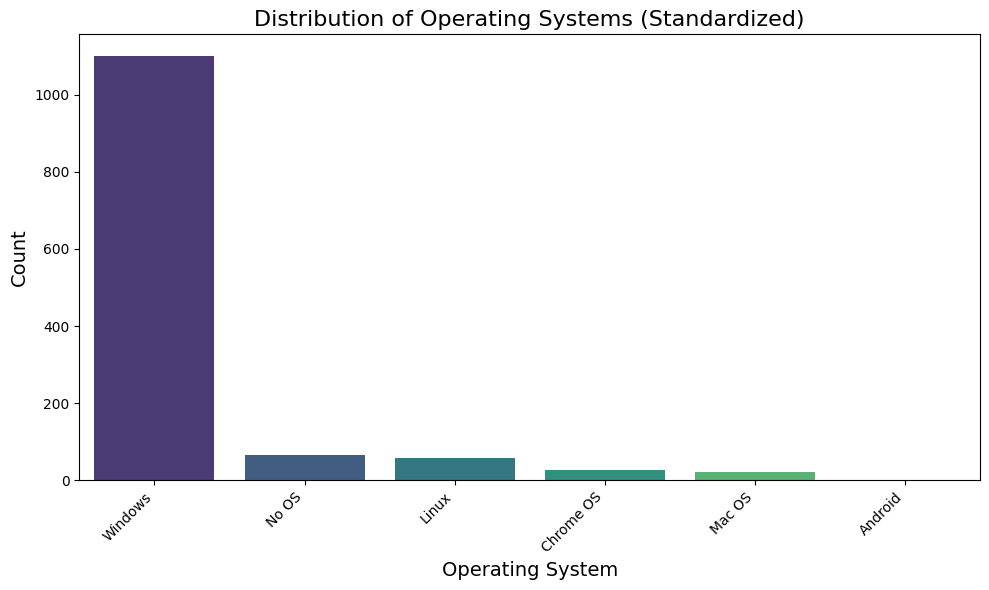

In [ ]:
# Mapping similar OS names to a standard format
os_mapping = {
    'macOS': 'Mac OS',
    'Mac OS X': 'Mac OS',
    'Windows 10': 'Windows',
    'Windows 10 S': 'Windows',
    'Windows 7': 'Windows',
    'No OS': 'No OS',
    'Linux': 'Linux',
    'Android': 'Android',
    'Chrome OS': 'Chrome OS'
}

# Apply the mapping
laptops_df['opsys'] = laptops_df['opsys'].map(os_mapping)

# Count the occurrences of each standardized OS
os_counts = laptops_df['opsys'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=os_counts.index, y=os_counts.values, palette="viridis")

# Add titles and labels
plt.title("Distribution of Operating Systems (Standardized)", fontsize=16)
plt.xlabel("Operating System", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Plot for each of the operating system types the distribution of the prices, so that the
number of plots equals to the number of unique operating systems.

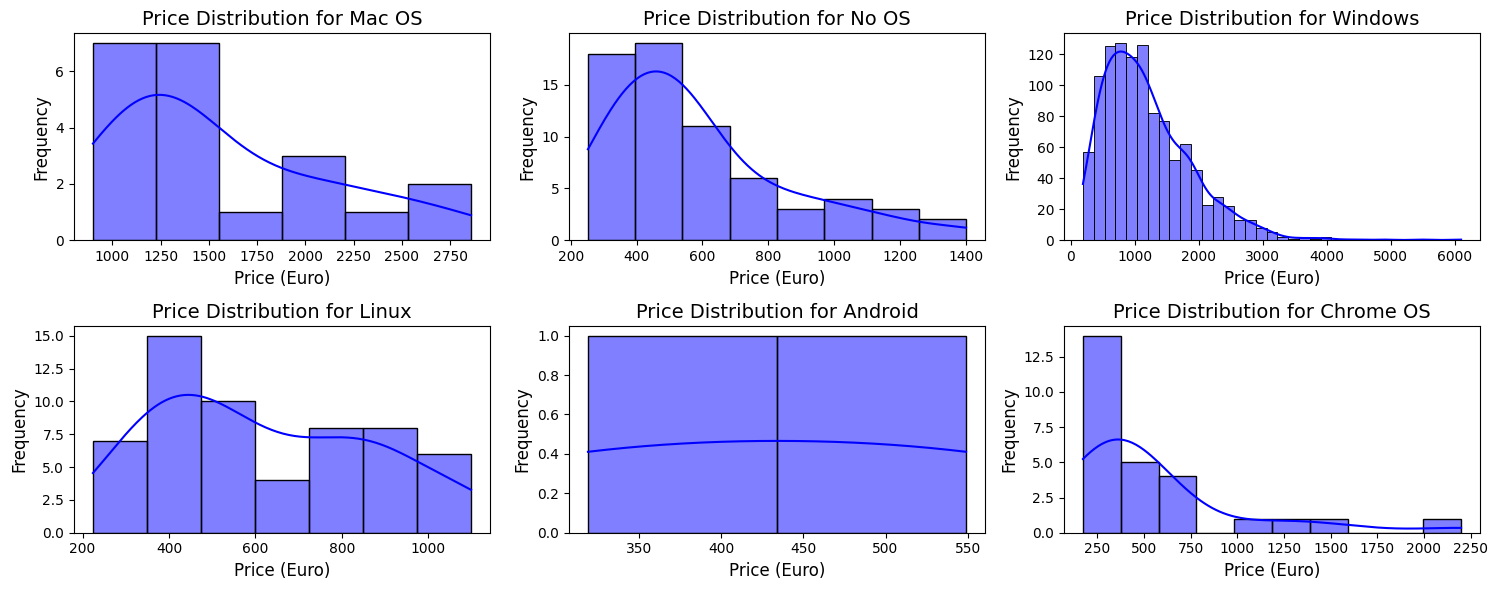

In [ ]:
# Get the unique operating systems
unique_os = laptops_df['opsys'].unique()

# Set up the grid for subplots
num_plots = len(unique_os)
rows = num_plots // 3 + (1 if num_plots % 3 > 0 else 0)
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, rows * 3))
axes = axes.flatten() 

# Plot the distribution for each operating system
for i, os in enumerate(unique_os):
    os_data = laptops_df[laptops_df['opsys'] == os] 
    sns.histplot(os_data['price (euro)'], kde=True, color='blue', ax=axes[i])
    
    # Set the title and labels for each subplot
    axes[i].set_title(f"Price Distribution for {os}", fontsize=14)
    axes[i].set_xlabel("Price (Euro)", fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)

# Hide any remaining empty axes
for j in range(num_plots, len(axes)):
    axes[j].axis('off') 

# Adjust layout to avoid clipping
plt.tight_layout()
plt.show()


What is the relationship between RAM and computer price? add an adequate plot to
support your findings.

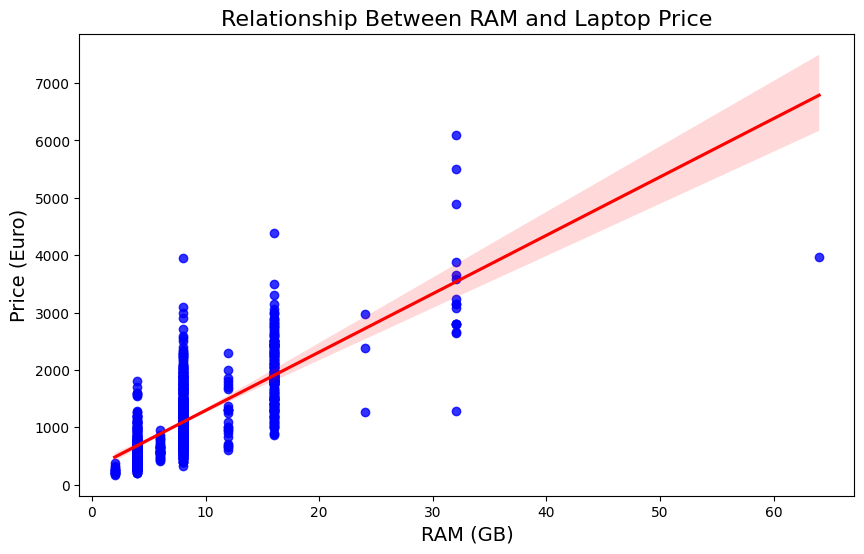

In [ ]:
# Ensure that the "ram (gb)" column is numeric
laptops_df['ram (gb)'] = pd.to_numeric(laptops_df['ram (gb)'], errors='coerce')  
laptops_df.dropna(subset=['ram (gb)', 'price (euro)'], inplace=True) 

# Create the scatter plot with a regression line
plt.figure(figsize=(10,6))
sns.regplot(x='ram (gb)', y='price (euro)', data=laptops_df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Relationship Between RAM and Laptop Price', fontsize=16)
plt.xlabel('RAM (GB)', fontsize=14)
plt.ylabel('Price (Euro)', fontsize=14)
plt.show()

Create a new column for the dataframe called "Storage type" that extracts the
storage type from the column "Memory".

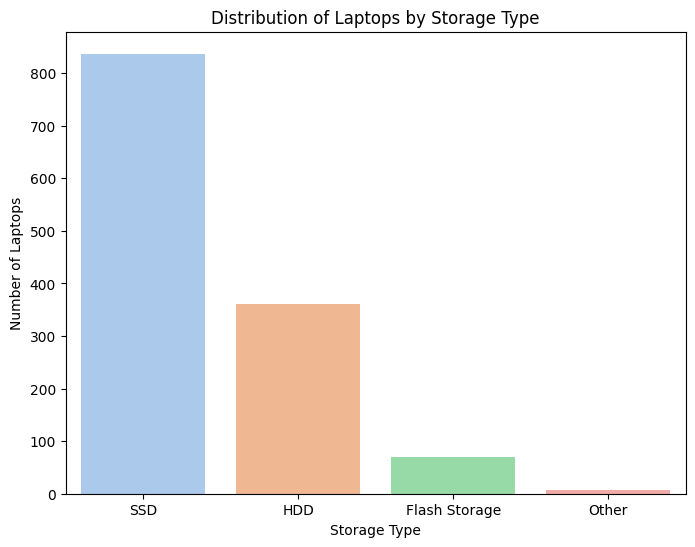

In [47]:
# Create a new column "Storage type" based on more comprehensive matching
laptops_df['storage type'] = laptops_df['memory'].apply(lambda x: 
                                                      'SSD' if 'SSD' in str(x) else 
                                                      ('HDD' if 'HDD' in str(x) else 
                                                       ('Flash Storage' if 'Flash Storage' in str(x) else 'Other')))

# Count the number of laptops for each storage type
storage_type_counts = laptops_df['storage type'].value_counts()

# Create a bar plot to show the distribution of storage types
plt.figure(figsize=(8, 6))
sns.barplot(x=storage_type_counts.index, y=storage_type_counts.values, palette='pastel')

# Add labels and title
plt.xlabel('Storage Type')
plt.ylabel('Number of Laptops')
plt.title('Distribution of Laptops by Storage Type')

# Display the plot
plt.show()


Q3 : Think of additional questions related to this data. What types of analyses and
visualizations would you use to address them? Select two questions from your list and
implement. Submit your list of questions, suggested analyses and visualizations and the
implementation.


List of Questions
- What is the distribution of laptop prices based on their type (e.g., ultrabook, notebook)?
- Is there a correlation between screen size (Inches) and price?
- What is the average laptop price by weight category (lightweight, medium, heavy)?
- How does the number of RAM (GB) influence the price distribution for each operating system?
- Which CPU manufacturers have the most expensive laptops on average?

Selected question 1 : What is the distribution of laptop prices based on their type (e.g., ultrabook, notebook)?

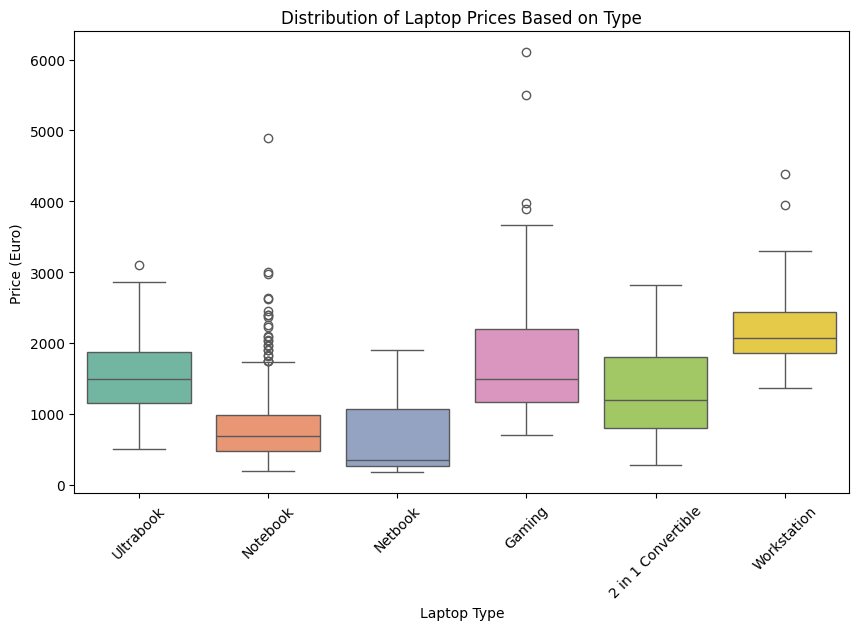

In [49]:
# Group by 'TypeName' and calculate the average and distribution of laptop prices
plt.figure(figsize=(10, 6))
sns.boxplot(x='typename', y='price (euro)', data=laptops_df, palette='Set2')

# Add labels and title
plt.xlabel('Laptop Type')
plt.ylabel('Price (Euro)')
plt.title('Distribution of Laptop Prices Based on Type')

# Display the plot
plt.xticks(rotation=45)
plt.show()


Question 2 : Is there a correlation between screen size (Inches) and price?

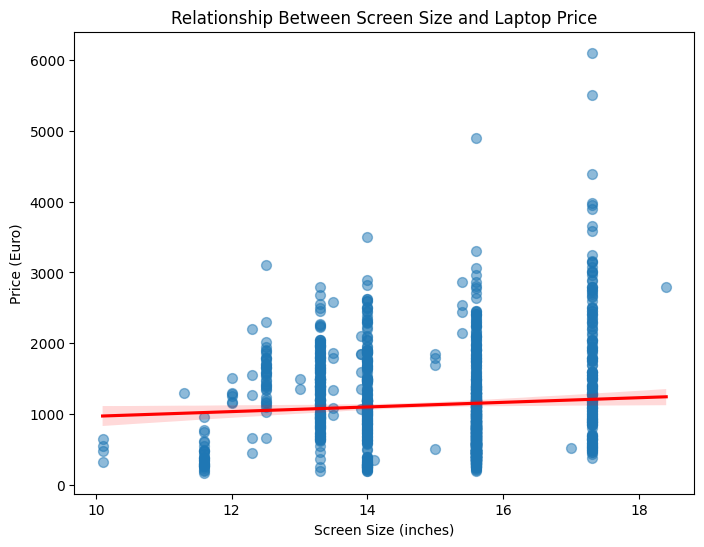

In [51]:
# Ensure 'Inches' and 'price (euro)' are numeric
laptops_df['inches'] = pd.to_numeric(laptops_df['inches'], errors='coerce')

# Create a scatter plot with a regression line to show the relationship
plt.figure(figsize=(8, 6))
sns.regplot(x='inches', y='price (euro)', data=laptops_df, scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'red'})

# Add labels and title
plt.xlabel('Screen Size (inches)')
plt.ylabel('Price (Euro)')
plt.title('Relationship Between Screen Size and Laptop Price')

# Display the plot
plt.show()
